# I-94 Traffic Dataset Analysis

- This is a dataset of westbound traffic (cars moving from east to west) on the **I-94 Interstate Highway**. The data is recorded at a station located approx. between Minneapolis and Saint Paul.

*This means that the results of our analysis will be about westbound traffic in the proximity of the location and not for the entire highway I-94.*

- The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [51]:
import pandas as pd
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [52]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [53]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [54]:
(traffic['date_time'].str[:10]
 .value_counts()
 .sort_index(ascending = True)
 .unique
)

<bound method Series.unique of 2012-10-02    15
2012-10-03    20
2012-10-04    24
2012-10-05    22
2012-10-06    23
              ..
2018-09-26    24
2018-09-27    25
2018-09-28    24
2018-09-29    25
2018-09-30    26
Name: date_time, Length: 1860, dtype: int64>

- Our dataset contains data collected hourly from October 2012 to September 2018.

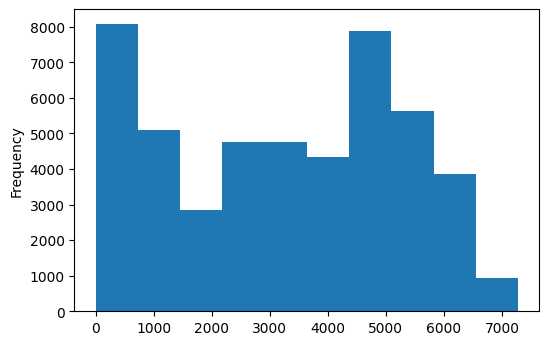

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()
plt.show()

traffic['traffic_volume'].describe()

> From the above, it can be seen that on an average 3260 cars pass through the station each day.
> About 25% times, the number of cars passing is only 1193- this probably occurs during the nights or when the road is under repair.
> Other observation is that, 25% times the cars passing is about 4times the minimum- possibly during peak daytime.

> This could mean that that the day and night time might influence the traffic volumes. Thus, further in the project, we can analyze the data set in this direction.

## Daytime vs. Nighttime traffic

In [56]:
# Divide the dataset into two parts
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

# Daytime data: 7am to 7pm
traffic_day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(f'Day: {traffic_day.shape}')

# Nightime data: 7pm to 7am
traffic_night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(f'Night: {traffic_night.shape}')

Day: (23877, 9)
Night: (24327, 9)


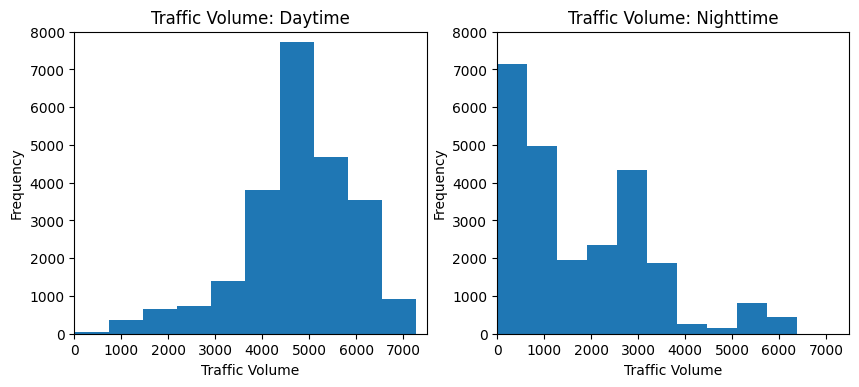

In [57]:
# Plot day and night data as histograms on a grid

plt.figure(figsize = (10, 4))

plt.subplot(1,2,1)
traffic_day['traffic_volume'].plot.hist()
plt.xlim(0, 7500)
plt.ylim(0,8000)
plt.title("Traffic Volume: Daytime")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
traffic_night['traffic_volume'].plot.hist()
plt.xlim(0, 7500)
plt.ylim(0,8000)
plt.title("Traffic Volume: Nighttime")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")

plt.show()

In [58]:
traffic_day['traffic_volume'].describe()


count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [59]:
traffic_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

- The daytime histogram is *left skewed* indicating that there is heavy traffic 75% of the time (about 5559 cars).


- The nighttime histogram is *right skewed*, which means that the traffic is light for most of time(about 2819 cars). Although there are maximum of 6386 carspassing during the time frame, it isonly for a short period. **Thus the traffic during the  night time can in general be considered light**.


- Since our goal is to find indicators for heavy traffic, moving forward, **we are going to focus only on daytime traffic.**

- One possible indicator of heavy traffic is **time**- that is there might be more people on the road in a certain month, on a certain day or at a certain time of the day.

- So now, we are going to analyze the traffic_volume change according to the following parameters:
        - Month
        - Day of the week
        - Time of the day

## Traffic Volume analysis by month

We can do it in the fastest way possible using the `df.groupby()` method.

In [60]:
traffic_day['month'] = traffic_day['date_time'].dt.month 
# To create a new column with value describing the month of traffic measurement

traffic_by_month = traffic_day.groupby('month').mean()
# To group the dataset by `month` column with `mean` as aggregate function

traffic_by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

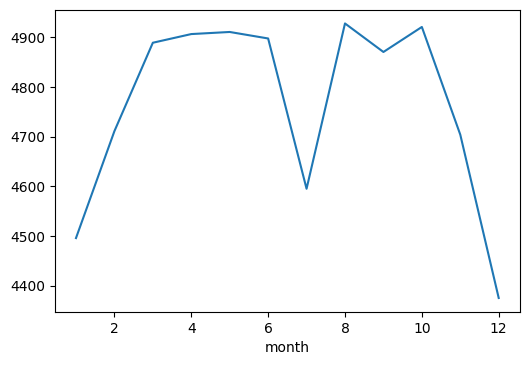

In [61]:
traffic_by_month['traffic_volume'].plot.line()

- The traffic looks more or less similar during the cold months and the hot months with an interesting exception.

- The exception is **July**. The traffic volume is very less compared to the other months. What could be the reason?

## Inspecting July month

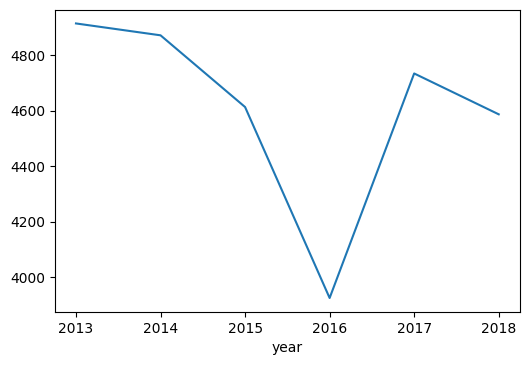

In [62]:
traffic_day['year'] = traffic_day['date_time'].dt.year
only_july = traffic_day[traffic_day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

- On observing the graph above, it can be seen that, typically, the traffic volume during July is similar to any other warm month in a year except in 2016. This dip during the year 2016 is the reason that caused the exception for July month in our `traffic_by_month` analysis.

- The possible reason for the dip in July 2016 could be road construction. This has to be corraborated with information from the State Department which is beyond the scope of this project.

- Therefore, the conclusion is that traffic is slightly heavy during the warm months (about 5000 cars) than the cold months.

## Traffic volume analysis by day of the week

In [63]:
traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek
traffic_by_dayofweek = traffic_day.groupby('dayofweek').mean()
traffic_by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

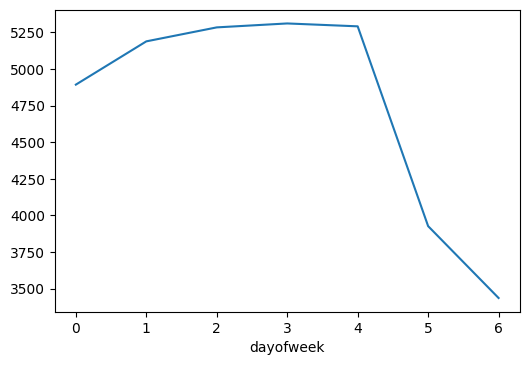

In [64]:
traffic_by_dayofweek['traffic_volume'].plot.line() 
# 0 is Monday, 6 is Sunday

- The traffic is heavier during the weekdays than during the weekends(Saturday & Sunday).

- Even during the weekdays, Monday has a slight exception with fewer cars than the rest of the weekdays.

## Traffic Volume Analysis by time of the day

- Since the traffic during the weekends is less, it will drag down the averages when we plot by time of the day. 

- For this reason, we'd split the data based on the type of the day: 
        - weekday and 
        - weekend

In [65]:
traffic_day['hour'] = traffic_day['date_time'].dt.hour

weekday = traffic_day.copy()[traffic_day['dayofweek'] <= 4] 
# 4 is Friday
weekend = traffic_day.copy()[traffic_day['dayofweek'] >= 5]
# 5 is Saturday

by_hour_weekday = weekday.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(f"Weekday {by_hour_weekday['traffic_volume']}")
print(f"Weekend {by_hour_weekend['traffic_volume']}")

Weekday hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
Weekend hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


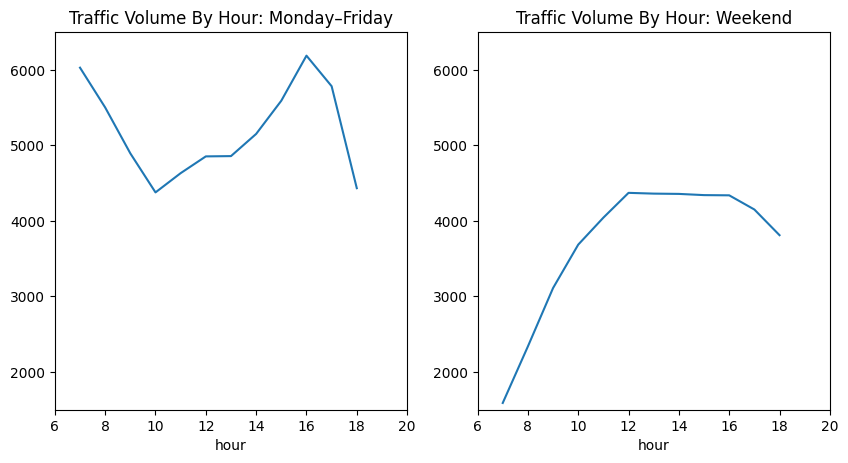

In [66]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
by_hour_weekday['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

- Generally speaking, the volume of traffic is higher on a weekday than on weekends.

- During weekdays the rush hours are 7am and 4pm with about 6000 cars on the road- probably the time when people travel to and return from work.

- On the weekends, the peak hours are from 12noon to 4pm approximately.

**To summarize, we found a few time-related indicators of heavy traffic:**

> The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

> The traffic is usually heavier on weekdays compared to weekends.

> On weekdays, the rush hours are around 7am and 4pm.

## Traffic Volume Analysis by Weather conditions

- Another possible indicator of heavy traffic is **weather**. 

- The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

- Some of these columns are numerical, so we can look if they have any correlation with the `traffic_volume`.

In [67]:
traffic_day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

- From the above statistics it can be seen that the `temp` column has strong **positive correlation** with the `traffic_volume` column. This means that the traffic volume increases with the increase in temperature.

- No other weather conditions (`rain_1h`, `snow_1h`, `clouds_all`) show any strong correlation with the traffic volume. So they don't seem like reliable indicators for heavy traffic.

- To depict the correlation between temperature and traffic volume visually, a scatter plot can be helpful.

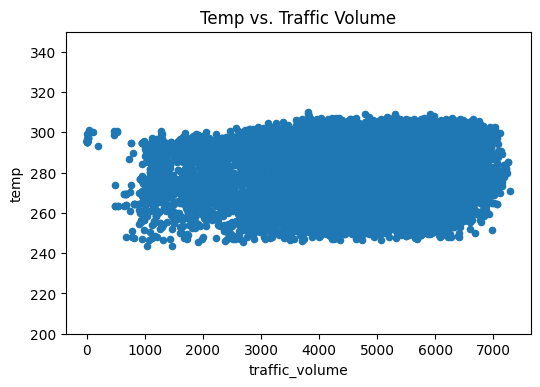

In [68]:
# Scatterplot for temperaturevs traffic_volume

traffic_day.plot.scatter('traffic_volume', 'temp')
plt.title("Temp vs. Traffic Volume")
plt.ylim(200, 350)
plt.show()

- Thus, we can conclude that temperature doesn't look like a reliable indicator of heavy traffic either. (correlation = +0.13)

- Since we didn't find any reliable weather indicators examining the numerical weather columns, next, let's look at the categorical weather columns- `weather_main` and `weather_description`.

In [69]:
traffic_day['weather_main'].value_counts()

Clouds          8702
Clear           5744
Rain            2841
Mist            2593
Snow            1454
Drizzle          883
Haze             834
Thunderstorm     451
Fog              362
Smoke             12
Squall             1
Name: weather_main, dtype: int64

In [70]:
traffic_day['weather_description'].value_counts()

sky is clear                           4892
broken clouds                          2793
mist                                   2593
overcast clouds                        2585
scattered clouds                       2181
light rain                             1707
few clouds                             1143
light snow                              978
Sky is Clear                            852
haze                                    834
moderate rain                           785
light intensity drizzle                 573
fog                                     362
heavy snow                              320
proximity thunderstorm                  303
drizzle                                 278
heavy intensity rain                    219
snow                                    137
proximity shower rain                   111
thunderstorm                             48
heavy intensity drizzle                  29
thunderstorm with heavy rain             25
thunderstorm with light rain    

- Looking at the number of unique values, `weather_main` looks manageable and thus could generate valuable results on analysis.


- Thus, we are going to group the data by `weather_main` column using mean as an aggregate function.

In [71]:
by_weather_main = traffic_day.groupby('weather_main').mean()

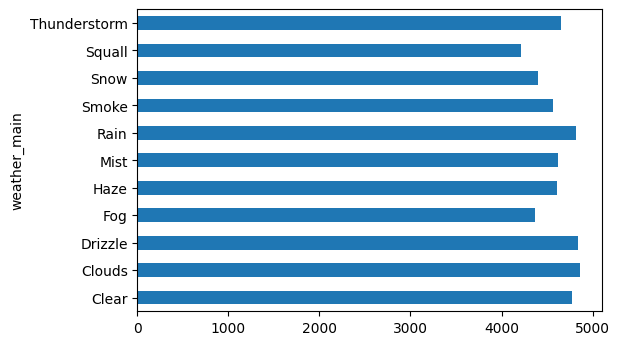

In [72]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()


- It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. 

- Let's also group by `weather_description`, which has a more granular weather classification.

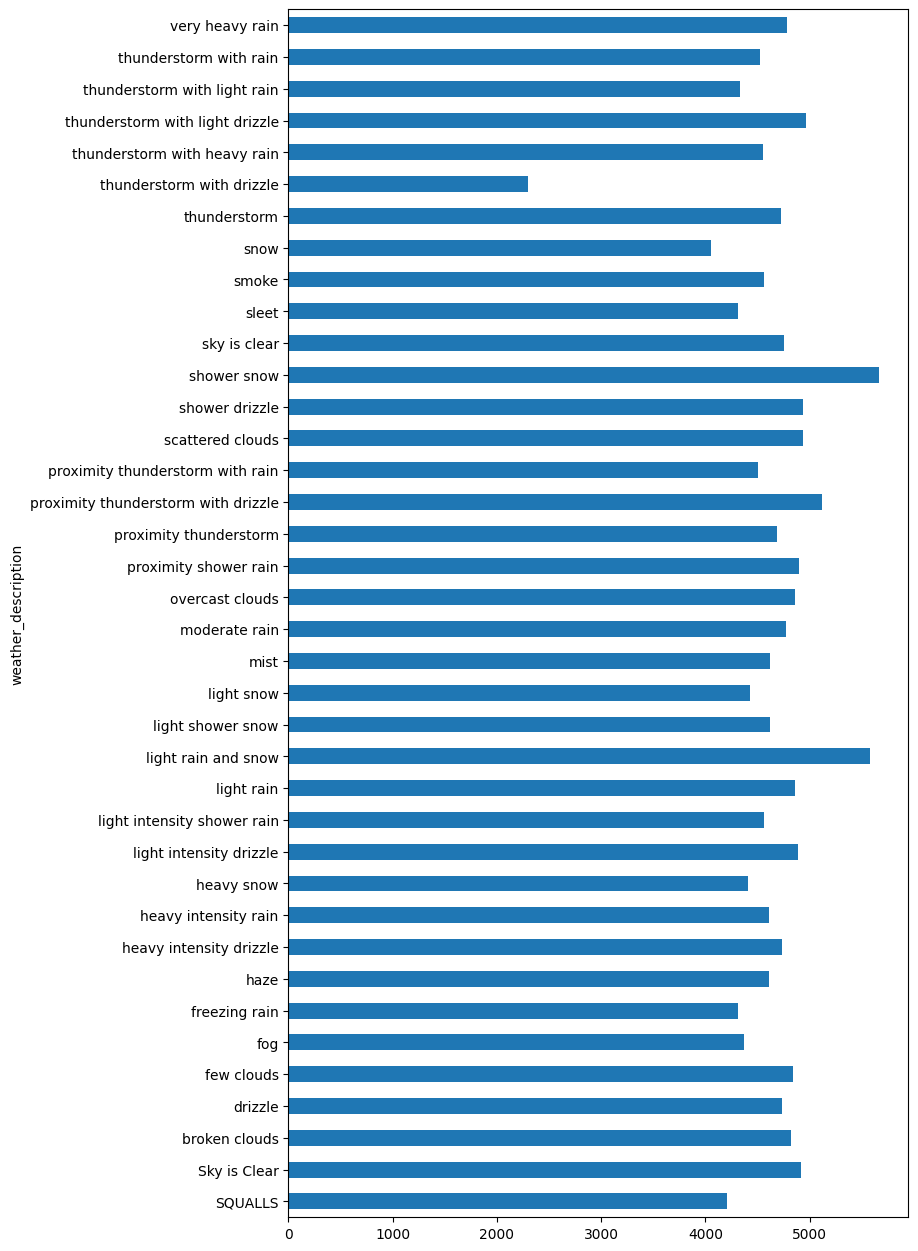

In [73]:
by_weather_description = traffic_day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize = (8,16))
plt.show()

- The traffic volume exceeded 5000 in three weather conditions:
        - shower snow
        - light rain and snow
        - proximity thunderstorm with drizzle
        
- The reason for the increase in traffic during bad weather like snow and rain is a little ambiguious- probably people use cars during such conditions instead of riding a bike or walking.

## Conclusion

In this project, we analyzed the westbound traffic on I-94 highway at a station in between Minneapolis and Saint Paul to find any indicators of heavy traffic.

We found out 2 types of indicators:

        - Time indicators and
        
        - Weather indicators
        
- **Time indicators**:
1. The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
2. The traffic is usually heavier on business days compared to the weekends.
3. On weekdays, the rush hours are around 7am and 4pm.

- **Weather indicators**:
1. Shower snow
2. Light rain and snow
3. Proximity thunderstorm with drizzle